In [48]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Generate noisy signal

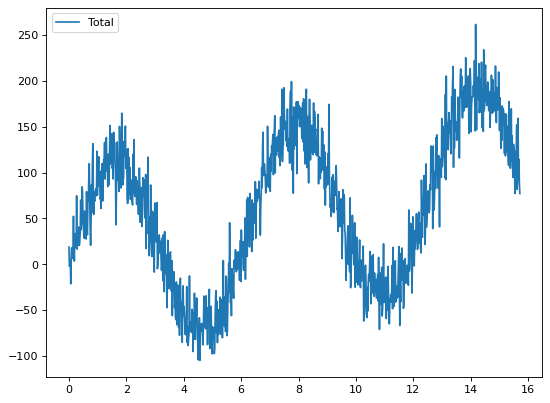

In [47]:
x = np.linspace(0, 5 * np.pi, num=1000)
y = 100 * np.sin(x) + np.random.normal(scale=23, size=x.size) + np.linspace(0, 100, num=1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, label='Total')
plt.legend()
plt.show()

## keep low frequencies only --> SIGNAL SMOOTHING

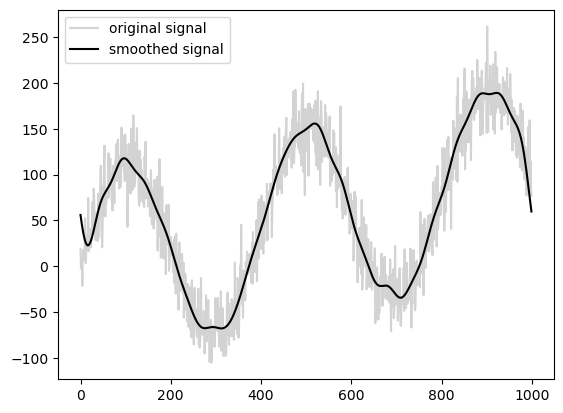

In [69]:
def low_pass(s, threshold=1000):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2 / s.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

low_freq_s = low_pass(y)
plt.plot(y, color='lightgray', label = 'original signal')
plt.plot(low_freq_s, color='black', label = 'smoothed signal')
plt.legend()
plt.show()

## Keep high frequencies only --> NOISE EXTRACTION

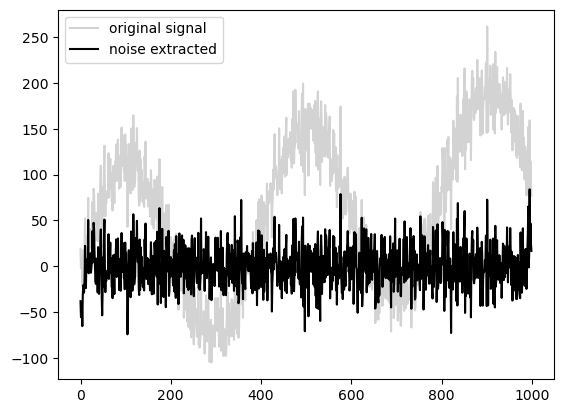

In [71]:
def high_pass(s, threshold=1000):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2/s.size)
    fourier[frequencies < threshold] = 0
    return irfft(fourier)

high_freq_s = high_pass(y)
plt.plot(y, color='lightgray', label = 'original signal')
plt.plot(high_freq_s, color='black', label = 'noise extracted')
plt.legend()
plt.show()

## Reconstruct original signal with (noise extraction + smoothed signal)

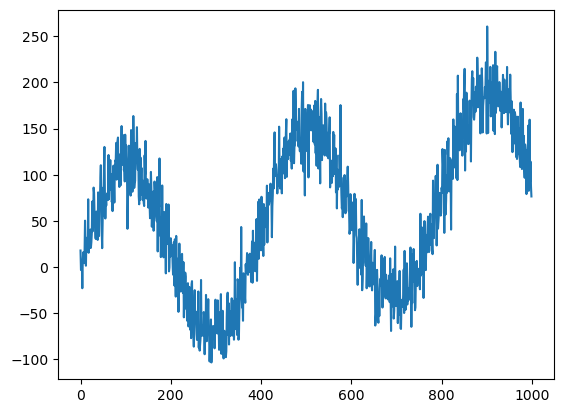

In [68]:
plt.plot(high_freq_s + low_freq_s)
plt.show()